In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # optional may be helpful for plotting percentage
import numpy as np
import pandas as pd
import seaborn as sb # optional to set plot theme
sb.set_theme() # optional to set plot theme

import yfinance as yf

In [2]:
DEFAULT_START = dt.date.isoformat(dt.date.today() - dt.timedelta(365))
DEFAULT_END = dt.date.isoformat(dt.date.today())

class Stock:
    def __init__(self, symbol, start=DEFAULT_START, end=DEFAULT_END):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.data = self.get_data()


    def get_data(self):
        """method that downloads data and stores in a DataFrame
           uncomment the code below wich should be the final two lines 
           of your method"""
        data = yf.download(self.symbol, start=self.start, end=self.end)
        self.calc_returns(data)
        return data
    
    
    def calc_returns(self, df):
        """method that adds change and return columns to data"""
        #Change column
        df['change'] = df['Close'].diff()
        #Instant return column
        df['instant_return'] = np.log(df['Close']).diff().round(4)
        return df

    
    def plot_return_dist(self):
        """method that plots instantaneous returns as histogram"""
        plt.hist(self.data['instant_return'], bins=30, edgecolor='b', color='b', alpha=0.3)
        plt.title('Histogram of instant returns')
        plt.xlabel('Instantaneous Return')
        plt.ylabel('Frequency')
        plt.show()

    def plot_performance(self):
        """method that plots stock object performance as percent """
        plt.figure(figsize=(10, 6))
        percent_change = (self.data['Close'] / self.data['Close'].iloc[0] - 1) * 100
        plt.plot(self.data.index, percent_change, label='Percent Gain/Loss', color='green', linewidth=2)
        plt.title('Stock Performance Over Time')
        plt.xlabel('Date')
        plt.ylabel('Percent Gain/Loss')
        plt.legend()
        plt.grid(True)
        plt.show()

[*********************100%%**********************]  1 of 1 completed


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-02-13   97.849998   99.680000   96.910004   99.540001   99.540001   
2023-02-14   98.410004  100.919998   97.519997   99.699997   99.699997   
2023-02-15   99.089996  101.169998   98.449997  101.160004  101.160004   
2023-02-16   99.209999  100.629997   98.099998   98.150002   98.150002   
2023-02-17   97.800003   97.940002   95.650002   97.199997   97.199997   
...                ...         ...         ...         ...         ...   
2024-02-06  169.389999  170.710007  167.649994  169.149994  169.149994   
2024-02-07  169.479996  170.880005  168.940002  170.529999  170.529999   
2024-02-08  169.649994  171.429993  168.880005  169.839996  169.839996   
2024-02-09  170.899994  175.000000  170.580002  174.449997  174.449997   
2024-02-12  174.800003  175.389999  171.539993  172.339996  172.339996   

              Volume    change  insta

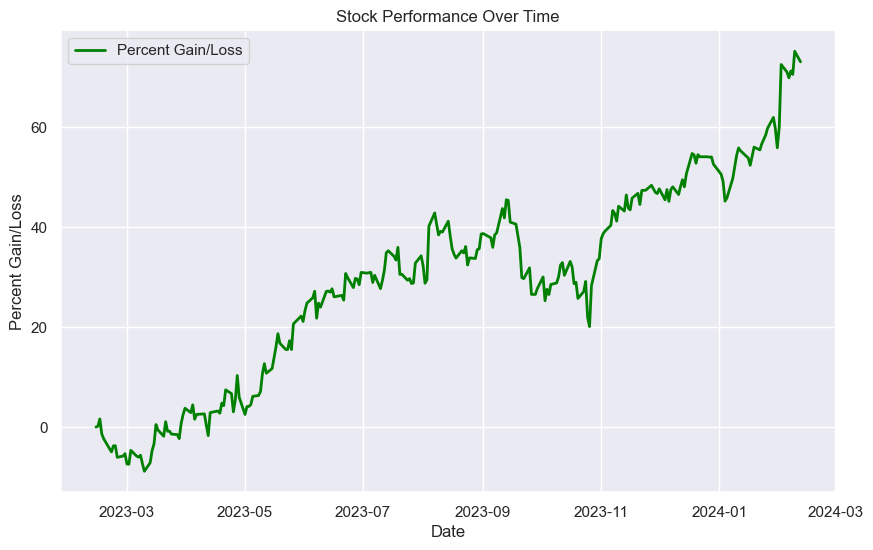

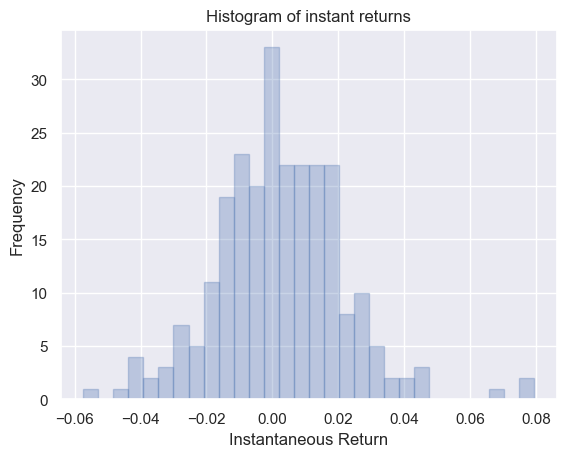

In [3]:
def main():
    # uncomment (remove pass) code below to test
    test = Stock(symbol="AMZN") # optionally test custom data range
    print(test.data)
    test.plot_performance()
    test.plot_return_dist()

if __name__ == '__main__':
    main() 